<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작 필요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (17.1 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetyp

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

# Linear Regression

In [2]:
import numpy as np

## 선형 회귀 분석 데이터셋 만들기

* 표준정규분포를 따르는 x_0, x_1을 200개 생성
beta_0 = 1, beta_1 = -0.1, beta_2 = 0.8 이고
노이즈의 분산을 0.4로 하여 y를 생성

In [75]:
n = 200 # 데이터 생성 수
np.random.seed(42) # 매번 동일한 난수 생성하기 위해 랜덤 Seed를 42로 지정
x_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x_1 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
beta_0, beta_1, beta_2, eps = 1, -0.3, 0.8, 0.4 # eps는 noise의 분산
y = beta_0 + beta_1 * x_0 + beta_2 * x_1 + np.random.normal(scale=eps, size=n) 
np.mean(x_0), np.var(x_0), np.mean(x_1), np.var(x_1) # 각각 평균과 분산을 뽑아 확인

(-0.04077096517208498,
 0.8624344486801115,
 0.0858681868988765,
 0.9693056403571758)

x_0, x_1으로 Matrix X를 만든다.

In [76]:
X = np.vstack([x_0, x_1]).T

* 각각의 속성값과 (x_0, x_1)과 y값의 산포도 그래프를 찍는다.

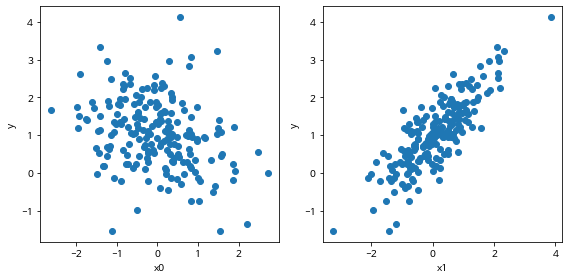

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.tight_layout()
plt.show()

## 학습

## 정규방정식

$\beta=(X^TX)^{-1}X^Ty$

In [78]:
X_1 = np.hstack([np.ones((X.shape[0], 1)), X])

In [79]:
gram_matrix = np.matmul(X_1.T, X_1)
inv_gram_matrix = np.linalg.inv(gram_matrix)
beta = np.dot(inv_gram_matrix,  np.dot(X_1.T, y))
beta

array([ 0.96412765, -0.35649907,  0.79192737])

## 경사하강법

$\frac{\partial F}{\partial\beta_0}=\frac{\sum\limits_{i=1}^{n}-(y_i-\beta_0-x_i^T\beta)}{n}$

$\frac{\partial F}{\partial\beta}=\frac{\sum\limits_{i=1}^{n}-x_i(y_i-\beta_0-x_i^T\beta)}{n}$

In [105]:
np.random.seed(42)
beta =  np.random.rand(3) * 2 - 1 # [-1, 1) 까지 랜덤 번호 생성
beta_0 = beta[0]
beta = beta[1:]
learning_rate = 0.1
epoch = 10
for j in range(epoch):
    y_delta =  y - beta_0 - np.matmul(X, beta)
    """
    ### Vectorized Operation을 사용하지 않는다면
    F_delta_by_beta_0 = 0
    F_delta_by_beta = np.zeros(2)
    for i in range(i):
        F_delta_by_beta_0 += -y_delta[i]
        F_delta_by_beta += -x[i] * y_delta[i]
    F_delta_by_beta_0 = F_delta_by_beta_0 / n
    F_delta_by_beta = F_delta_by_beta / n
    """
    F_delta_by_beta_0 = -np.mean(y_delta)
    #F_delta_by_beta = -np.mean(X * y_delta[:, np.newaxis], axis=0)
    F_delta_by_beta = -np.dot(X.T, y_delta) / n # 좀 더효율적이고 간결하다
    beta_0 -= learning_rate * F_delta_by_beta_0
    beta -= learning_rate * F_delta_by_beta

벡터화 연산(Vectorized Operation) 활용의 중요성

In [103]:
%%timeit

F_delta_by_beta_0 = 0
F_delta_by_beta = np.zeros(2)
for i in range(X.shape[0]):
    F_delta_by_beta_0 += -y_delta[i]
    F_delta_by_beta += -X[i] * y_delta[i]
F_delta_by_beta_0 = F_delta_by_beta_0 / n
F_delta_by_beta = F_delta_by_beta / n

713 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [106]:
%%timeit

-np.dot(X.T, y_delta) / n

3.95 µs ± 547 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [107]:
%%timeit

-np.mean(X * y_delta[:, np.newaxis], axis=0)

19.2 µs ± 6.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


* x_0는 평균 10, 분산 4가 되도록 변환 
* x_1은 평균 -40, 분산이 16이 되도록 변환

In [44]:
x_0 = x_0 * 2 + 10 # 표준편차 2를 곱하고 여기에 평균 10을 더한다
x_1 = x_1 * 20 - 40 # 표준편차 20를 곱하고 여기에 평균 -40을 더한다
np.mean(x_0), np.var(x_0), np.mean(x_1), np.var(x_1) # 각각 평균과 분산을 뽑아 확인

(9.91845806965583, 3.449737794720446, -38.28263626202247, 387.7222561428703)

* 각각의 속성값과 (x_0, x_1)과 y값의 산포도 그래프를 찍는다.

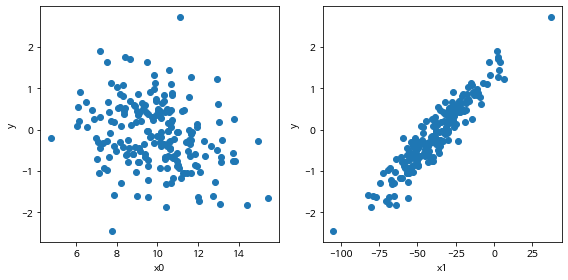

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.tight_layout()
plt.show()

## 정규방정식으로 학습

In [47]:
X_1 = np.hstack([np.ones((X.shape[0], 1)), X]) # 절편을 구하기 위해서 전부 값이 1인 열을 추가

In [50]:
beta = np.dot(np.linalg.inv(np.matmul(X_1.T, X_1)),  np.dot(X_1.T, y))
beta_hat0, beta_hat1, beta_hat2  = beta[0], beta[1], beta[2]

In [53]:
beta_1, beta_hat1, beta_2, beta_hat2

(-0.3, -0.1500000000000018, 0.8, 0.04000000000000022)

표준화가 되어 있지 않는다면 계수를 가지고 중요성, 상대적으로 분산이 큰 속성은 계수의 크기 작다.

* 표준정규분포로(Z-scaling)로 정규화를 진행해 본다.

$X\_std = \frac{(X-\bar{X})}{s}$

In [54]:
X_std =  (X - np.mean(X, axis=0)) / np.std(X, axis=0) # Z-scaling

X_std 

In [ ]:
from sklearn.datasets import make_regression

[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) 회귀 분석 데이터셋을 만든다. 

n_samples=100, n_features=5, n_informative=3, random_state=9, coef=True 로 해서 데이터셋 생성하여 입력 값은 X에 출력은 y 값, 계수는 coef에 설정.

In [ ]:
X, y, coef = make_regression(n_samples=100, n_features=5, n_informative=3, random_state=9, coef=True)
X.shape, y.shape, coef

((100, 5),
 (100,),
 array([ 6.74479784, 71.20447834,  0.        ,  0.        , 50.7033102 ]))

각각의 속성과, y를 산포도 그래프로 시각화

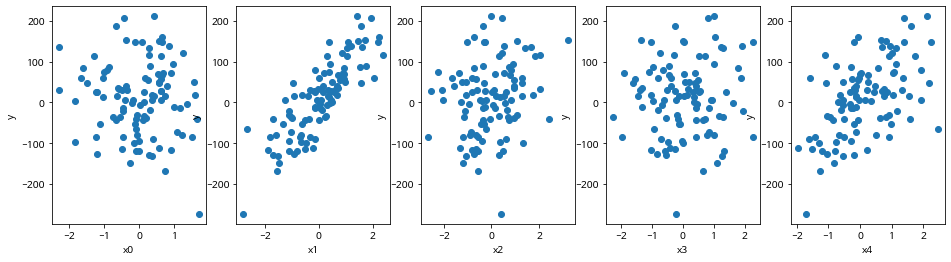

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.show()